In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Pellet-Position Model
The pupose of this notebook is to clean DLC output data and create a model that predicts reaching attempts based on pellet position.

In [28]:
def read_in_file(data_path):
    return pd.read_csv(data_path)

data_path = '../tests/data/IMG_42860.csv'
df = read_in_file(data_path)
df

,scorer,DLC_resnet_50_60fps_preopJul13shuffle1_175000,DLC_resnet_50_60fps_preopJul13shuffle1_175000.1,DLC_resnet_50_60fps_preopJul13shuffle1_175000.2,DLC_resnet_50_60fps_preopJul13shuffle1_175000.3,DLC_resnet_50_60fps_preopJul13shuffle1_175000.4,DLC_resnet_50_60fps_preopJul13shuffle1_175000.5,DLC_resnet_50_60fps_preopJul13shuffle1_175000.6,DLC_resnet_50_60fps_preopJul13shuffle1_175000.7,DLC_resnet_50_60fps_preopJul13shuffle1_175000.8,...,DLC_resnet_50_60fps_preopJul13shuffle1_175000.20,DLC_resnet_50_60fps_preopJul13shuffle1_175000.21,DLC_resnet_50_60fps_preopJul13shuffle1_175000.22,DLC_resnet_50_60fps_preopJul13shuffle1_175000.23,DLC_resnet_50_60fps_preopJul13shuffle1_175000.24,DLC_resnet_50_60fps_preopJul13shuffle1_175000.25,DLC_resnet_50_60fps_preopJul13shuffle1_175000.26,DLC_resnet_50_60fps_preopJul13shuffle1_175000.27,DLC_resnet_50_60fps_preopJul13shuffle1_175000.28,DLC_resnet_50_60fps_preopJul13shuffle1_175000.29
0,bodyparts,pellet,pellet,pellet,left_front_paw,left_front_paw,left_front_paw,right_front_paw,right_front_paw,right_front_paw,...,tweezers,tail,tail,tail,left_ear,left_ear,left_ear,right_ear,right_ear,right_ear
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,959.5631713867188,551.5493774414062,0.017462223768234253,851.1198120117188,651.4678955078125,0.7839577794075012,799.8922729492188,653.8176879882812,0.9668771028518677,...,0.844380259513855,1044.505126953125,907.0687255859375,0.9978765249252319,954.4398193359375,543.95654296875,0.0718134343624115,934.4312744140625,532.4207763671875,0.29956769943237305
3,1,962.9755249023438,557.6464233398438,0.01507064700126648,800.1857299804688,654.3504638671875,0.8733574151992798,816.9218139648438,639.5746459960938,0.9752591848373413,...,0.8674204349517822,1042.6727294921875,904.37158203125,0.9899207353591919,953.8720703125,545.8843994140625,0.06767416000366211,932.9210815429688,533.9939575195312,0.4863281548023224
4,2,960.25732421875,554.2949829101562,0.009098023176193237,900.6825561523438,989.0921020507812,0.5076432228088379,803.3637084960938,646.503662109375,0.9735993146896362,...,0.6212026476860046,1041.24462890625,900.4659423828125,0.925787091255188,954.1234741210938,545.396484375,0.32921358942985535,933.2098388671875,533.2340698242188,0.7253526449203491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15372,15370,734.2930908203125,895.9496459960938,0.15351033210754395,747.3272705078125,900.2633056640625,0.9957513213157654,806.3057250976562,962.4015502929688,0.781478762626648,...,0.02436286211013794,1176.1522216796875,914.0897216796875,0.9993273615837097,904.3489990234375,841.777099609375,0.9972541332244873,879.087158203125,804.1016845703125,0.9981801509857178
15373,15371,734.8530883789062,895.8141479492188,0.11365377902984619,747.3873291015625,899.9696655273438,0.9955846071243286,806.2838745117188,961.2685546875,0.8231228590011597,...,0.0181276798248291,1175.6241455078125,914.543701171875,0.9994807839393616,904.6982421875,842.5027465820312,0.9977132081985474,880.3031005859375,803.2192993164062,0.9988013505935669
15374,15372,733.9976806640625,895.6065673828125,0.16271188855171204,747.22705078125,900.0421752929688,0.9960511922836304,806.38818359375,962.0960693359375,0.7670537233352661,...,0.023209810256958008,1173.7293701171875,915.2703247070312,0.9995483160018921,905.082763671875,843.2334594726562,0.9977120757102966,880.9013061523438,803.4631958007812,0.9990110397338867
15375,15373,734.1859130859375,895.50390625,0.17582130432128906,747.2891845703125,900.0270385742188,0.9955935478210449,806.20703125,961.5667724609375,0.7705123424530029,...,0.027642786502838135,1174.441650390625,915.8894653320312,0.9995369911193848,905.6883544921875,843.42138671875,0.9958634376525879,881.699462890625,804.9435424804688,0.9989663362503052


In [29]:
[i for i in df.iloc[0, 1::3]]

['pellet',
 'left_front_paw',
 'right_front_paw',
 'left_hind_paw',
 'right_hind_paw',
 'snout',
 'tweezers',
 'tail',
 'left_ear',
 'right_ear']

In [30]:
df_pellet = df.iloc[2:, :3]
df_pellet = df_pellet.reset_index(drop=True)

In [31]:
df_pellet = df_pellet.rename(columns = {'DLC_resnet_50_pre_post_opJul4shuffle1_550000.9': 'x_coord', 'DLC_resnet_50_pre_post_opJul4shuffle1_550000.10': 'y_coord', 'DLC_resnet_50_pre_post_opJul4shuffle1_550000.11': 'prob'})

In [32]:
df_pellet = df_pellet.to_numpy(dtype ='float32')

In [33]:
df_pellet.shape

(15375, 3)

In [34]:
for i in range(df_pellet.shape[0]):
    if (df_pellet[i, 2] < 0.5):
        df_pellet[i, 1] = 0
        df_pellet[i, 0] = 0

In [35]:
df_pellet

array([[0.0000000e+00, 9.5956317e+02, 5.5154938e+02],
       [1.0000000e+00, 9.6297552e+02, 5.5764642e+02],
       [2.0000000e+00, 9.6025732e+02, 5.5429498e+02],
       ...,
       [1.5372000e+04, 7.3399768e+02, 8.9560657e+02],
       [1.5373000e+04, 7.3418591e+02, 8.9550391e+02],
       [1.5374000e+04, 7.3334552e+02, 8.9567950e+02]], dtype=float32)

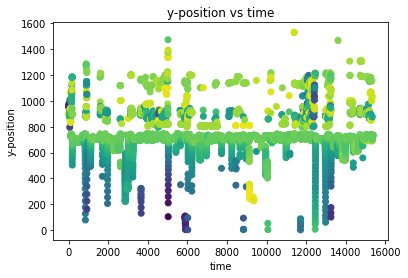

In [22]:
import numpy as np 
from matplotlib import pyplot as plt 

t = np.arange(df_pellet.shape[0])
y = df_pellet[:,1]
prob = df_pellet[:,2]
plt.title("y-position vs time") 
plt.xlabel("time") 
plt.ylabel("y-position") 
plt.scatter(t,y, c=prob)
plt.show()

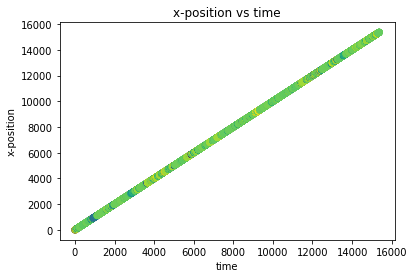

In [23]:
t = np.arange(df_pellet.shape[0])
x = df_pellet[:,0]
prob = df_pellet[:,2]
plt.title("x-position vs time") 
plt.xlabel("time") 
plt.ylabel("x-position") 
plt.scatter(t, x, c=prob)
plt.show()

In [11]:
def convert_to_time(time):
    seconds = int(time % 60)
    minutes = int(time / 60)
    return (minutes, seconds)

In [12]:
# convert to time stamps
def output_time_stamps(data_frame):
    attempt_ongoing = False
    for i in range(data_frame.shape[0]):
        if (data_frame[i, 2] > 0.5):
            if (not attempt_ongoing):
                attempt_ongoing = True
                time = convert_to_time(i / 29)
                print("Start Attempt: ", str(time[0]) + ":" + str(time[1]))
        else:
            if (attempt_ongoing):
                time = convert_to_time(i / 29)
                print("End Attempt: ", str(time[0]) + ":" + str(time[1]))
                attempt_ongoing = False

In [13]:
output_time_stamps(df_pellet)

NameError: name 'df_pellet' is not defined

In [14]:
%jt -l

UsageError: Line magic function `%jt` not found.
